Install Dependencies

In [1]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

/var/folders/rc/j294rj094lb9j6zz6fcghj7m0000gn/T/ipykernel_22433/628143034.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
cpus = tf.config.experimental.list_physical_devices('CPU')
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
#create a variable to hold the data path
data_dir = 'data'

In [5]:
#setting the image extension to a list
image_exts = ["jpg", "jpeg", "png", "bmp"]


In [6]:
for root,dirs, files in os.walk(data_dir):
    for file in files:
        image_path = os.path.join(root, file)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            
            #os.remove(image_path)
            

Image not in ext list data/.DS_Store


Loading the data

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()

Found 141 files belonging to 2 classes.


In [8]:
#this will return a batch of images and labels. so you can rerun this cell to get another batch
batch = data_iterator.next()
# the images are represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [9]:
#the labels 0 or 1 represent the class of the image(happy or sad)
batch[1]

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int32)

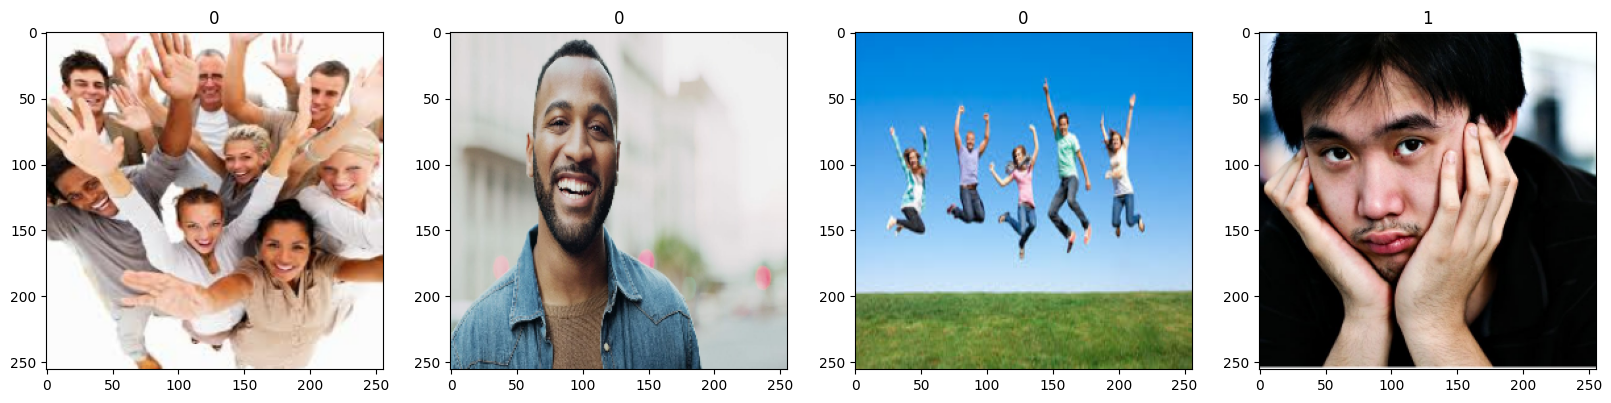

In [10]:
#this would help us classify the labels and we can see here that 0 is happy and 1 is sad

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype("int"))
    ax[idx].title.set_text(batch[1][idx])


Data Preprocessing 

Scale the data

In [11]:
data = data.map(lambda x, y: (x /255, y))

In [12]:
scaled_iterator = data.as_numpy_iterator()

In [13]:
batch = scaled_iterator.next()

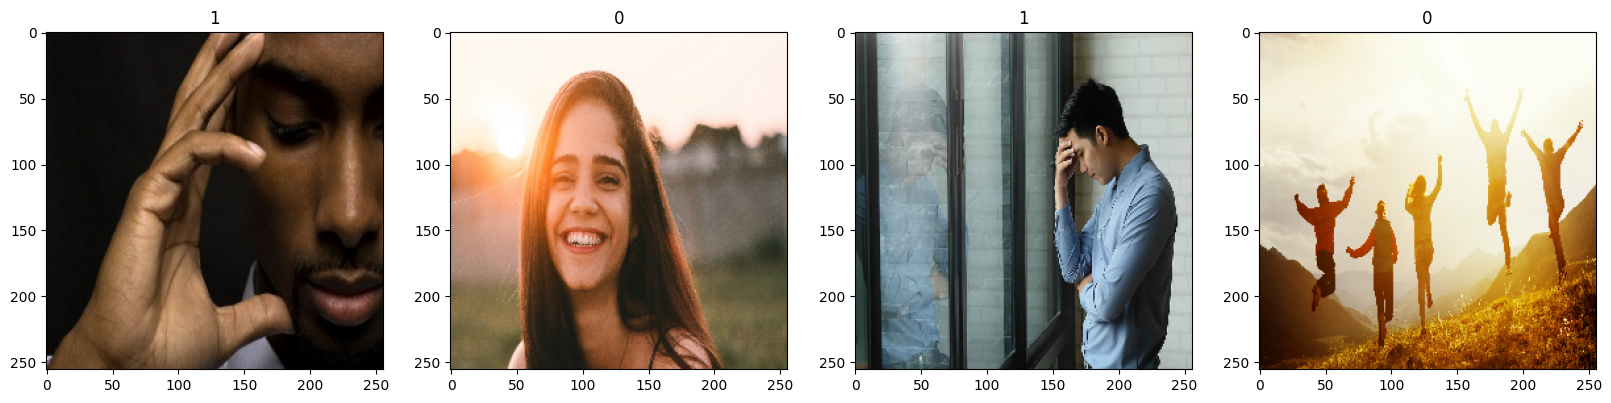

In [14]:

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])


Split the data into train and test sets

In [15]:
train_size = int(len(data) * 0.7)
validation_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.2)

In [16]:
train = data.take(train_size)
validation = data.skip(train_size).take(validation_size)
test = data.skip(train_size + validation_size).take(test_size)

Deep learning

Building the deep learning model

In [17]:
model = Sequential()

In [18]:
#Adding the different layers

model.add(Conv2D(16, (3,3), 1,padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1,padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1,padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
#compiling the model
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)        0

Train the deep learning model

In [21]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [22]:
hist = model.fit(train, epochs=20, validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 10s 3s/step - loss: 1.8496 - accuracy: 0.5521 - val_loss: 0.7290 - val_accuracy: 0.7188
Epoch 2/20
3/3 [==============================] - 8s 2s/step - loss: 0.8381 - accuracy: 0.4583 - val_loss: 0.6974 - val_accuracy: 0.4375
Epoch 3/20
3/3 [==============================] - 8s 2s/step - loss: 0.6022 - accuracy: 0.6354 - val_loss: 0.4918 - val_accuracy: 0.7188
Epoch 4/20
3/3 [==============================] - 7s 2s/step - loss: 0.4586 - accuracy: 0.7188 - val_loss: 0.4727 - val_accuracy: 0.7500
Epoch 5/20
3/3 [==============================] - 8s 2s/step - loss: 0.3966 - accuracy: 0.7708 - val_loss: 0.2030 - val_accuracy: 0.9688
Epoch 6/20
3/3 [==============================] - 8s 3s/step - loss: 0.3652 - accuracy: 0.8646 - val_loss: 0.2253 - val_accuracy: 0.8750
Epoch 7/20
3/3 [==============================] - 8s 3s/step - loss: 0.3180 - accuracy: 0.8854 - val_loss: 0.1520 - val_accuracy: 0.9688
Epoch 8/20
3/3 [========================

Plot performance

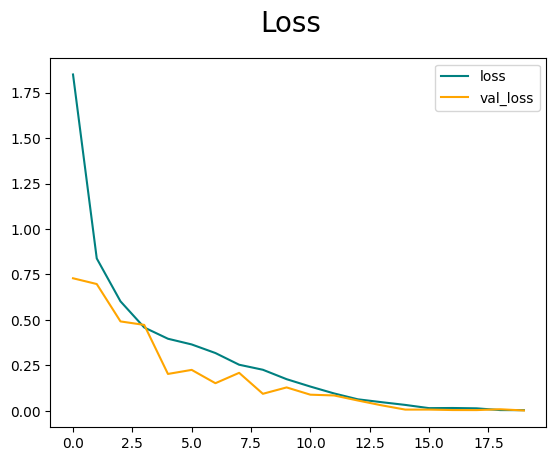

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label = 'loss')
plt.plot(hist.history['val_loss'], color='orange', label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

Evaluating Performance 

In [24]:
precision = Precision()
recall = Recall()
binary_accuracy = BinaryAccuracy()

In [25]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    binary_accuracy.update_state(y, yhat)
    
print('Precision: ', precision.result().numpy(),
      'Recall: ', recall.result().numpy(),
      'Accuracy: ', binary_accuracy.result().numpy(),
      )

1/1 [==============================] - 0s 155ms/step
Precision:  1.0 Recall:  1.0 Accuracy:  1.0


Test

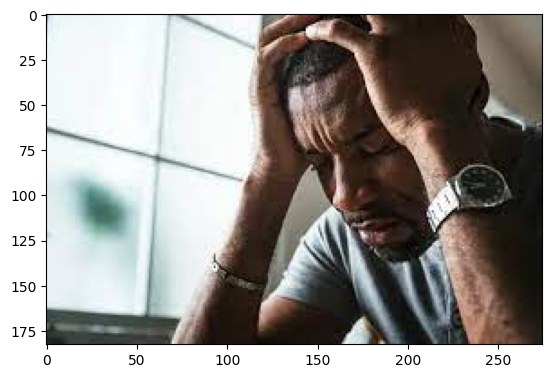

In [26]:
img = cv2.imread('sad people.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Note: before passing the image to our neural network it must be 256 pixels high, 256 pixels wide and it need to be  3 channels

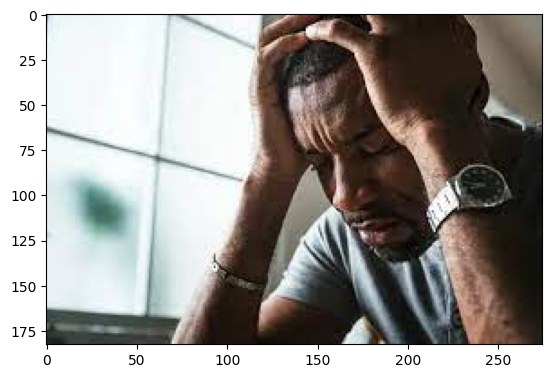

In [27]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [28]:
resize.shape

TensorShape([256, 256, 3])

In [29]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [30]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 61ms/step


In [31]:
yhat

array([[0.90575397]], dtype=float32)

In [32]:
if yhat < 0.5:
    print('Happy image')
else:
    print('Sad image')

Sad image


Saving the model

In [33]:
model.save(os.path.join('models', 'image_classification.h5'))

/Users/caephas/Documents/side_projects/Machine-Learning-Projects/CNN Image classifer/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
